<a href="https://colab.research.google.com/github/aasyngier/machine-learning/blob/main/ml_homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Understanding Splitting Criteria in CART for Regression**
---------------------

In this assignment, you will explore three common formulations of the splitting criterion used in **CART (Classification and Regression Trees)** for **regression problems**:

1. **Local RSS Minimization**  
2. **RSS Gain Maximization**  
3. **Total RSS Minimization**

You will investigate whether any of these criteria are equivalent, and you will design an experiment to determine which criterion is actually employed in a standard implementation such as **scikit-learn’s DecisionTreeRegressor**.



## **The Problem**

Many treatments of CART for regression describe the split selection process in different ways. Below are three frequently cited formulations. Suppose we have a dataset with features $X$ and target $y$, and we seek to choose a feature $X_j$ and a threshold $t$ to split the data into two regions $R_1(X_j, t)$ and $R_2(X_j, t)$. Denote by $\bar{y}_{R_m}$ the mean of targets within region $R_m$.

1. **Local RSS Minimization**  
   We select the feature and threshold that minimize the **sum of squared errors** in the two resulting child nodes:
   $$
   (X_j^*, t^*) = \arg\min_{X_j, t} \sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2.
   $$

2. **RSS Gain Maximization**  

   It is also a local method, looking only at a parent and two child nodes.

   We select the feature and threshold that maximize the **reduction** in RSS, computed by subtracting the RSS of the two child nodes from the RSS in the parent node:
   $$
   (X_j^*, t^*) = \arg\max_{X_j, t} \Bigl\{
   \underbrace{\sum_{i : x_i \in \text{Parent}} (y_i - \bar{y})^2}_{\text{Parent RSS}}
   \;-\;
   \underbrace{\sum_{m=1}^{2} \sum_{i : x_i \in R_m(X_j, t)} (y_i - \bar{y}_{R_m})^2}_{\text{Children RSS}}
   \Bigr\}.
   $$

3. **Total RSS Minimization**  
   For a dataset $\{(x_i, y_i)\}_{i=1}^N$ with features $X$ and target $y$, let $T$ be the current tree.

   For any split on feature $X_j$ at threshold $t$, define $T(X_j, t)$ as the new tree obtained by splitting one leaf of $T$ into two leaves $R_1(X_j, t)$ and $R_2(X_j, t)$.
   
   Let $\mathrm{Leaves}(T(X_j, t))$ be the set of all leaf indices in this new tree. For each leaf $m \in \mathrm{Leaves}(T(X_j, t))$, define:
   $$
   R_m = \{\, i \,\mid\, x_i \text{ ends in leaf } m\}.
   $$

   $R_m$ set collects all data indices $i$ whose feature vector $x_i$ is classified into the leaf node $m$ when passed through the tree $T(X_j,t)$. In other words, each leaf node $m$ in $T(X_j, t)$ corresponds to a unique path of splits, and any data point $x_i$ that follows that path is assigned to the leaf $m$; hence, it belongs to $R_m$.

   $R_m$ sets for all leafs $m \in \mathrm{Leaves}(T(X_j, t))$ define a partition of all indices.

   Then the objective of **minimizing total Residual Sum of Squares (total RSS)** is stated as:
   $$
   (X_j^*, t^*) = \arg\min_{(X_j, t)} \sum_{m \in \mathrm{Leaves}(T(X_j, t))}
   \sum_{i \in R_m} \Bigl(y_i - \overline{y}_{R_m}\Bigr)^2,
   $$
   where
   $$
   \overline{y}_{R_m} = \frac{1}{\lvert R_m \rvert}
   \sum_{i \in R_m} y_i
   $$
   is the mean response in leaf $m$.


## **Research Questions**

1. **Equivalence Analysis**  
   Determine whether the above formulations are equivalent or if they can yield different split choices. Specifically:
   - Are *local RSS minimization* and *RSS gain maximization* equivalent?
   - Does *total RSS minimization* coincide with either of these two, or is it distinct?
   
2. **Empirical Experiment**  
   Design and conduct a Python experiment to determine which of these formulations is implemented in `scikit-learn` in `DecisionTreeRegressor`. Present numerical results and plots to support your conclusion.

## **Tasks & Deliverables**

1. **Formulation Analysis**  
   - Compare *local RSS minimization*, *RSS gain maximization*, and *total RSS minimization*.
   - If you find that any pair of formulations is equivalent, provide a concise proof.  
   - If you find that they differ, construct a counterexample.

2. **Empirical Verification**  
   - Create a small artificial dataset and train a `DecisionTreeRegressor` from `scikit-learn`.
   - The dataset must be designed in a way that uniquely identifies the formulation used. Provide a short code snippet and a plot or table to support your conclusion.

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.


## 1. Equivalence analysis of local RSS minimization and RSS gain maximization

Notice that RSS gain maximization can be presented in the following way
$$
\mathrm{RSS}_{\rm parent}
- \sum_{m=1}^2\sum_{i\in R_m}(y_i - \bar y_{R_m})^2
\;=\;
\;\underbrace{\mathrm{const}}_{\text{independent of }X_j, t}-\;
\underbrace{\Bigl(
      \sum_{m=1}^2\sum_{i\in R_m}
      (y_i-\bar y_{R_m})^2
     \Bigr)}_{\text{Children RSS}}
$$

Thus we have

$$
\arg\min_{X_j,t}\sum_{m=1}^{2}\sum_{i\in R_m}\bigl(y_i-\bar{y}_{R_m}\bigr)^{2}
\;=\;
\arg\max_{X_j,t}\Bigl\{\mathrm{RSS}_{\text{parent}}
      -\sum_{m=1}^{2}\sum_{i\in R_m}\bigl(y_i-\bar{y}_{R_m}\bigr)^{2}\Bigr\}
$$


And hence

$$
\text{Local RSS minimization}\;\iff\;\text{RSS gain maximization.}
$$



## 2. Equivalence analysis of total RSS minimization and either of the two above

At first glance it may seem that these methods yield different results. However let's take a closer look at what is happening as we split a specific leaf of our current tree, $T$ with a leaf set, $\mathrm{Leaves}(T)$.

Suppose we split exactly one leaf $m_0\in\mathrm{Leaves}(T)$ by feature $X_j$ at threshold $t$, producing two new leaves $m_1,m_2$, while every other leaf remains unchanged.  Denote by $T(j,t)$ the resulting tree, and by $R_m$ the index‐set of points falling in leaf $m$.

Then the total RSS of $T(j,t)$ can be written as

$$
\sum_{m\in\mathrm{Leaves}(T(j,t))}\sum_{i\in R_m}\bigl(y_i-\bar y_{R_m}\bigr)^2
=
\underbrace{\sum_{\substack{m\in\mathrm{Leaves}(T)\\m\neq m_0}}
\sum_{i\in R_m}\bigl(y_i-\bar y_{R_m}\bigr)^2}_{\text{independent of }X_j, t}
\;+\;
\sum_{m\in\{m_1,m_2\}}\sum_{i\in R_m}\bigl(y_i-\bar y_{R_m}\bigr)^2
$$

Since the first term does not depend on our choice of $X_j$ and $t$, minimizing the total RSS is equivalent to minimizing only the new leaves’ RSS:

$$
\arg\min_{X_j,t}\;\sum_{m\in\mathrm{Leaves}(T(j,t))}\sum_{i\in R_m}(y_i-\bar y_{R_m})^2
\;=\;
\arg\min_{X_j,t}\;\sum_{m\in\{m_1,m_2\}}\sum_{i\in R_m}(y_i-\bar y_{R_m})^2
$$

And since the right‐hand side is exactly the local RSS objective, we obtain

$$
\text{Total RSS minimization}
\;\iff\;
\text{Local RSS minimization}
\;\iff\;
\text{RSS gain maximization}
$$


## 3. What if we attempt to pre-prun the tree and add conditions when training?

In both of the cases above we concluded that all three of the methods are equivalent when we don't impose any constraints during the training process. Let's explore if it changes when we try to pre-prun our tree.
  
#### Why pre‐pruning breaks global/local equivalence:

When you constrain the depth/ total number of leaves, the global total‐RSS objective would pick the sequence of splits that minimizes RSS across the entire final tree. On the other hand, a greedy local‐gain algorithm always picks the single next split that yields the largest immediate RSS reduction, then stops as soon as the depth/ leaf limit is reached.

## 4. Empirical Experiment

Let's now conduct a Python experiment to determine which of these formulations is implemented in scikit-learn in DecisionTreeRegressor. To observe the result we'll use pre-pruning: in our case let's impose a constraint on max_leaf_nodes $= 3$.


Our synthetic data:  

In [18]:
X = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,0,55,153,270,478,469], dtype=float)

| root_t | gain_root    | best_second_gain | total_gain_two_splits |
|-------:|-------------:|-----------------:|-------------------:|
|   5.5  |   266666.6667|          68644.0 |        335310.6667 |
|   6.5  |   296814.4048|          27608.1667|       324422.5714 |


- Local best (largest gain_root) is at $t=6.5$
- Global best (largest total_gain_two_splits) is at $t=5.5$

We now check which one of them the scikit‑learn tree picks as its first split.

In [19]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_leaf_nodes=3, random_state=0)
tree.fit(X, y)
print("Chosen root threshold:", tree.tree_.threshold[0])

Chosen root threshold: 6.5


Hence our empirical experiment confirms that even under pre‑pruning, scikit‑learn’s tree uses the greedy, local per‑node RSS‑gain criterion rather than optimizing the total RSS across all leaves.

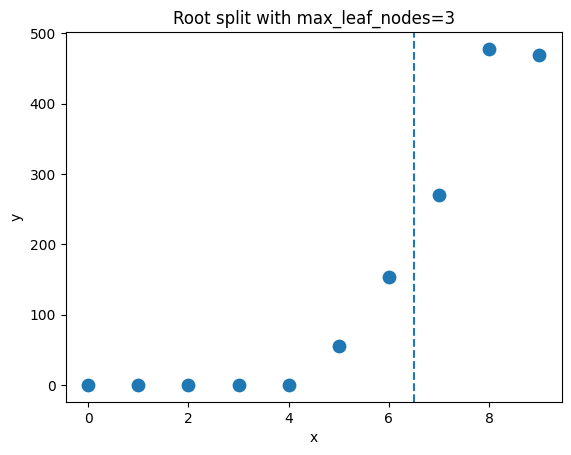

In [20]:
import matplotlib.pyplot as plt

t_chosen = tree.tree_.threshold[0]
plt.figure()
plt.scatter(X, y, s=80)
plt.axvline(t_chosen, linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Root split with max_leaf_nodes=3')
plt.show()

Here is the computation for the table presented earlier, comparing gains for the both thresholds:

In [21]:
import numpy as np
import pandas as pd

def rss(arr):
    return ((arr - arr.mean())**2).sum()

parent = rss(y)
thresholds = [5.5, 6.5]
rows = []

for t in thresholds:
    left  = y[X.ravel() <=  t]
    right = y[X.ravel() >   t]
    gain_root = parent - (rss(left) + rss(right))

    best_second = 0
    for arr, pos in [(left,  X.ravel()[X.ravel() <=  t]),
                     (right, X.ravel()[X.ravel() >   t])]:
        if len(arr) < 2: continue
        order = np.argsort(pos)
        pos_s  = pos[order]
        arr_s  = arr[order]
        mids   = [(pos_s[i] + pos_s[i+1])/2 for i in range(len(pos_s)-1)]
        for m in mids:
            l2 = arr_s[pos_s <= m]
            r2 = arr_s[pos_s >  m]
            if len(l2) and len(r2):
                gain2 = rss(arr_s) - (rss(l2) + rss(r2))
                best_second = max(best_second, gain2)

    total_gain = gain_root + best_second
    rows.append({
        'root_t':            t,
        'gain_root':         gain_root,
        'best_second_gain':  best_second,
        'total_gain_two_splits': total_gain
    })

pd.DataFrame(rows)

,root_t,gain_root,best_second_gain,total_gain_two_splits
0,5.5,266666.666667,68644.000000,335310.666667
1,6.5,296814.404762,27608.166667,324422.571429
